# 시계열 데이터 확인

## #01. 작업준비

### 1) 패키지 가져오기

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb
import sys

### 2) 데이터 가져오기

시계열 분석시 주의사항은 인덱스가 시간 혹은 날짜로 설정되어 있는지와 결측치 및 이상치의 확인이다. 

In [18]:
df = read_excel("C:/Users/User/Desktop/세종시 년도별 인구데이터 수정본.xlsx", index_col="시점")
df

,총인구,남자인구,여자인구,한국인인구,한국인남자인구,한국인여자인구,외국인인구,외국인남자인구,외국인여자인구,인구밀도,면적,인구증가율
시점,,,,,,,,,,,,
2022,388927,194570,194357,383591,191389,192202,5336,3181,2155,837.0,465.0,3.2
2021,376779,188619,188160,371895,185678,186217,4884,2941,1943,810.2,465.0,4.3
2020,360907,180741,180166,355831,177568,178263,5076,3173,1903,777.0,465.0,4.2
2019,346275,173432,172843,340575,169845,170730,5700,3587,2113,744.8,464.9,8.5
2018,319066,159840,159226,314126,156831,157295,4940,3009,1931,686.3,464.9,12.3
2017,284225,142213,142012,280100,139734,140366,4125,2479,1646,611.0,465.0,15.1
2016,246793,123740,123053,243048,121505,121543,3745,2235,1510,531.0,465.0,0.0


### 3) 그래프 초기화

In [19]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 살펴보기

### 1) 기초 통계량

In [20]:
df.describe()

,총인구,남자인구,여자인구,한국인인구,한국인남자인구,한국인여자인구,외국인인구,외국인남자인구,외국인여자인구,인구밀도,면적,인구증가율
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,331853.142857,166165.000000,165688.142857,327023.714286,163221.428571,163802.285714,4829.428571,2943.571429,1885.857143,713.900000,464.971429,6.800000
std,51631.794637,25787.205355,25844.930189,51066.776113,25430.174930,25636.953002,678.566591,455.557847,233.961841,111.180259,0.048795,5.388877
min,246793.000000,123740.000000,123053.000000,243048.000000,121505.000000,121543.000000,3745.000000,2235.000000,1510.000000,531.000000,464.900000,0.000000
25%,301645.500000,151026.500000,150619.000000,297113.000000,148282.500000,148830.500000,4504.500000,2710.000000,1774.500000,648.650000,464.950000,3.700000
50%,346275.000000,173432.000000,172843.000000,340575.000000,169845.000000,170730.000000,4940.000000,3009.000000,1931.000000,744.800000,465.000000,4.300000
75%,368843.000000,184680.000000,184163.000000,363863.000000,181623.000000,182240.000000,5206.000000,3177.000000,2028.000000,793.600000,465.000000,10.400000
max,388927.000000,194570.000000,194357.000000,383591.000000,191389.000000,192202.000000,5700.000000,3587.000000,2155.000000,837.000000,465.000000,15.100000


### 2) 결측치 확인

> 결측치가 없음이 확인된다.

In [21]:
df.isna().sum()

총인구        0
남자인구       0
여자인구       0
한국인인구      0
한국인남자인구    0
한국인여자인구    0
외국인인구      0
외국인남자인구    0
외국인여자인구    0
인구밀도       0
면적         0
인구증가율      0
dtype: int64

### 3) 상자그림 확인

> 이상치가 없음이 확인된다.

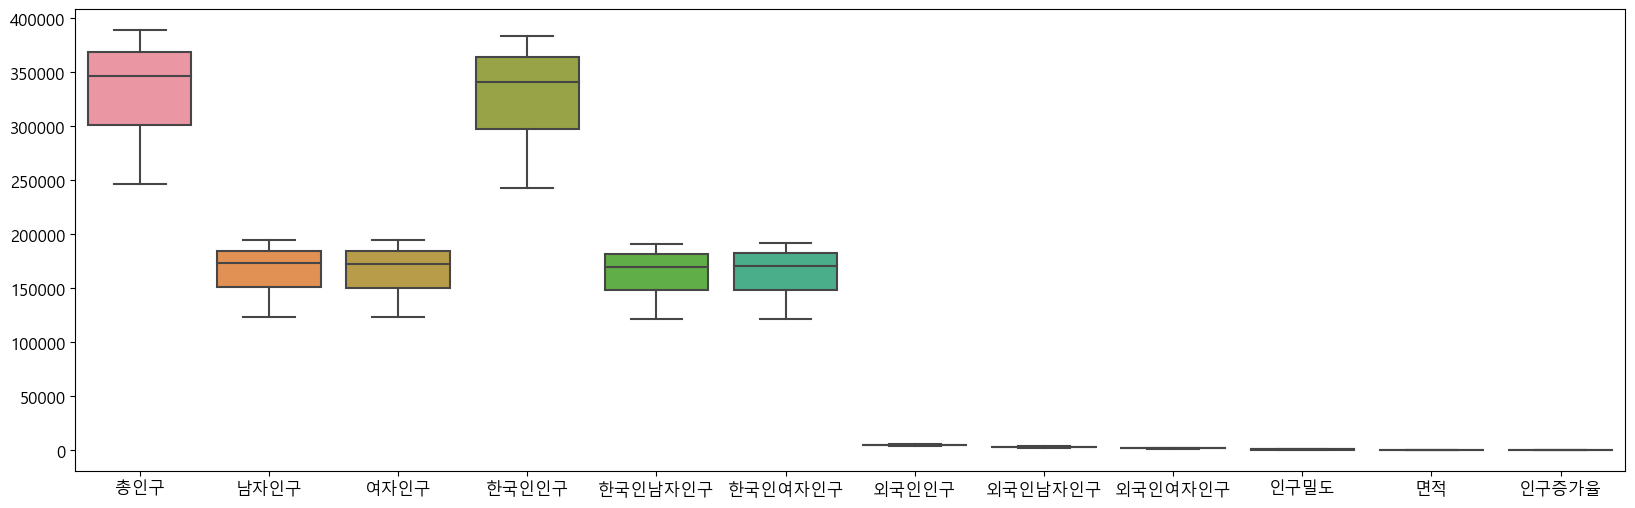

In [22]:
plt.figure(figsize=(20, 6))
sb.boxplot(data=df)
plt.show()
plt.close()

### 4) 기본 형태의 시계열 그래프를 통한 정상성 확인

데이터의 패턴은 보이지만 비정상성임을 알 수 있다.

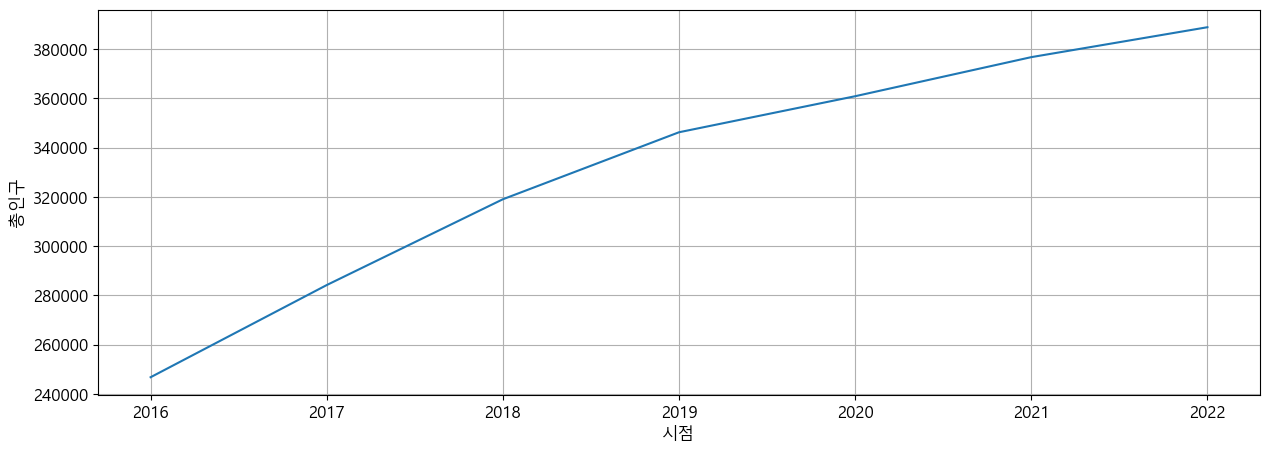

In [23]:
plt.figure()
sb.lineplot(df, x=df.index, y='총인구')
plt.grid()
plt.show()
plt.close()